In [1]:
using Revise, HarmonicBalance

In [2]:
@variables ω₁, ω, γ,λ, t, T, α₁, x(t)

#sympy object for the equation of motion
natural_equation = d(d(x, t),t) + ω₁^2*(1-λ*cos(2*ω*t)) * x + γ*d(x,t)  + α₁*x^3

dEOM = DifferentialEquation(natural_equation, x)

add_harmonic!(dEOM, x, ω) # x will rotate at ω

@time harmonic_eqs = get_harmonic_equations(dEOM, slow_time=T, fast_time=t)

 97.887043 seconds (127.18 M allocations: 9.128 GiB, 2.97% gc time, 99.45% compilation time)


A set of 2 harmonic equations
Variables: u1(T), v1(T)
Parameters: α₁, ω, γ, ω₁, λ

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)

Harmonic equations:

γ*Differential(T)(u1(T)) + (ω₁^2)*u1(T) + (3//4)*α₁*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α₁*(v1(T)^2)*u1(T) - (ω^2)*u1(T) - (1//2)*λ*(ω₁^2)*u1(T) ~ 0

γ*Differential(T)(v1(T)) + (ω₁^2)*v1(T) + (3//4)*α₁*(v1(T)^3) + (3//4)*α₁*(u1(T)^2)*v1(T) + (1//2)*λ*(ω₁^2)*v1(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - γ*ω*u1(T) ~ 0


## Arnold tongue of a single parametron

# 1D sweep

In [15]:
fixed_parameters =  [ω₁ => 1., γ => 0.001, α₁ => 1., λ => 0.05]
swept_parameters = ω => LinRange(0.7,1.2,50)

soln_1d = HarmonicBalance.get_steady_states(harmonic_eqs, swept_parameters, fixed_parameters; random_warmup=false, threading=false,sorting="nearest");

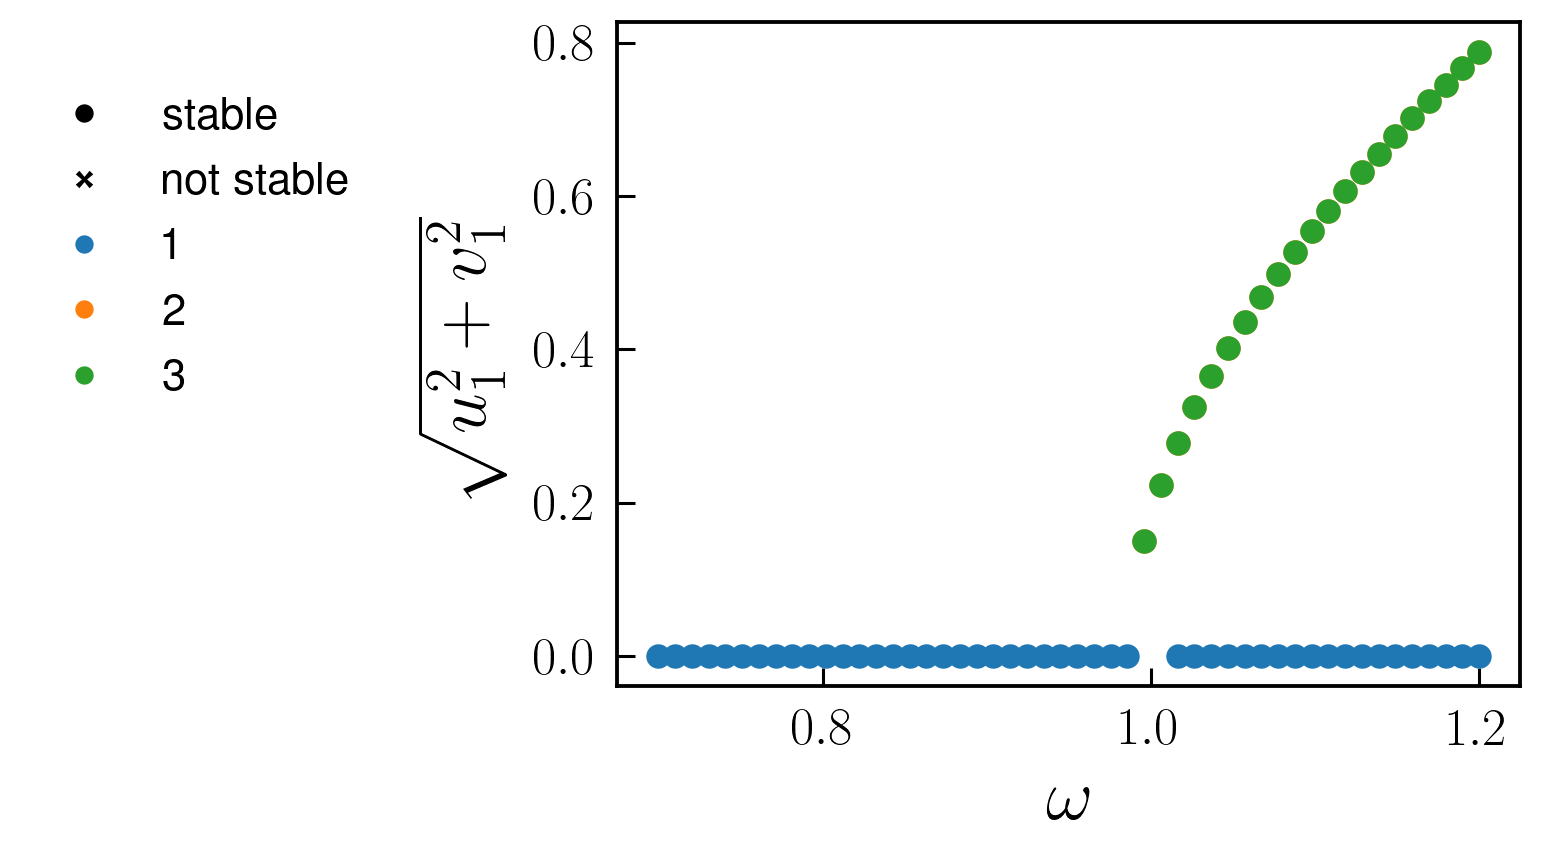

In [16]:
plot(soln_1d, x="ω", y="sqrt(u1^2 + v1^2)", plot_only=["physical","stable"]);

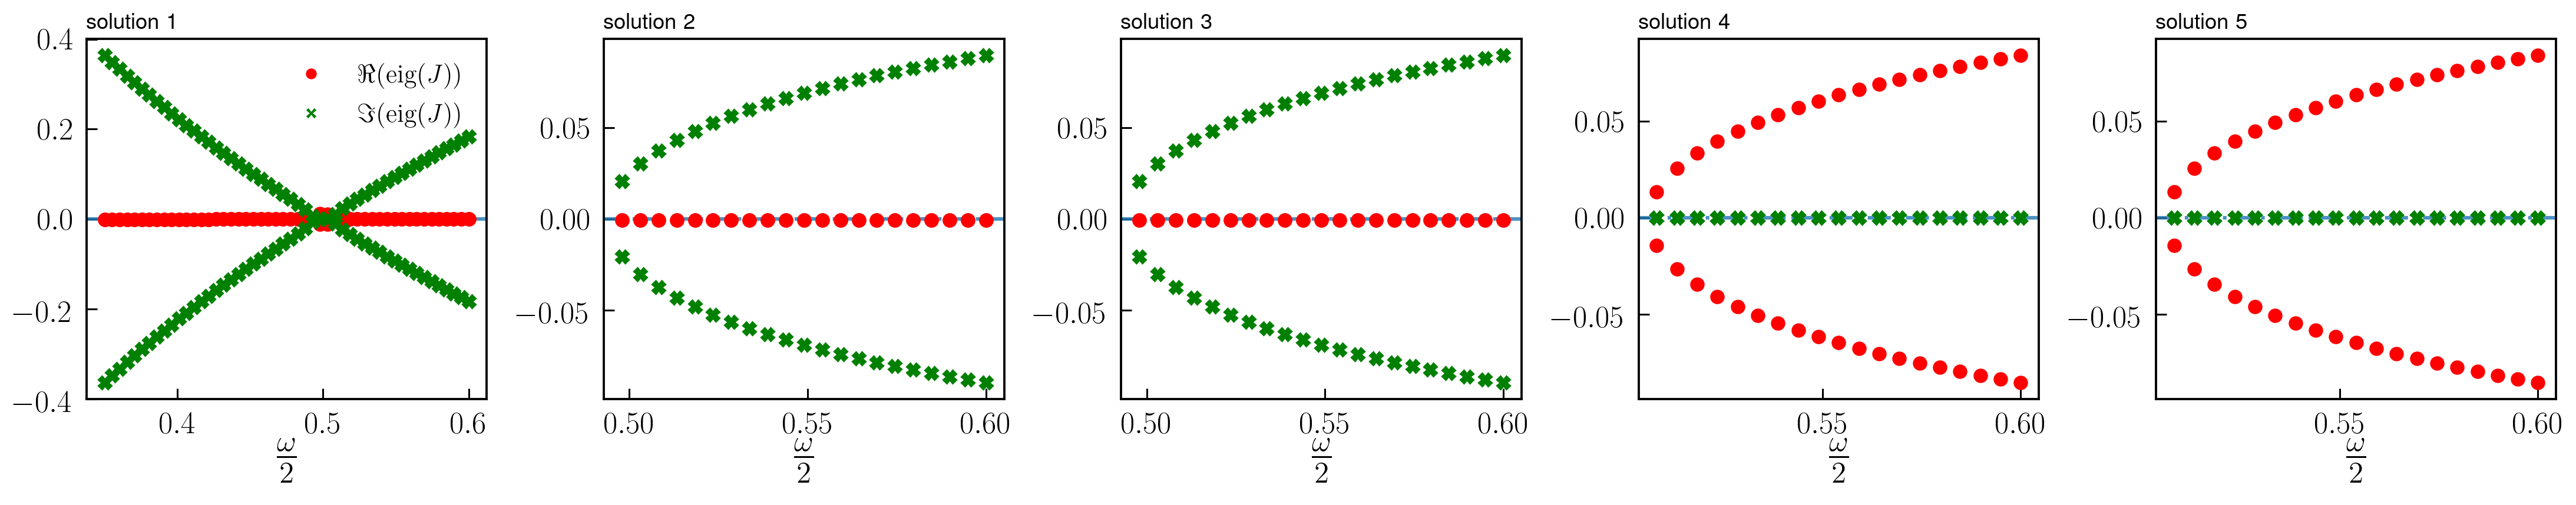

In [17]:
f,ax = HarmonicBalance.subplots(1,5,figsize=(4*5,4))
HarmonicBalance.plot_1D_jacobian_eigenvalues(soln_1d, x="ω/2", physical=true, stable=false,filename="plot_1D_jacobian",ax=ax);

# single parametron, 2D sweeps

In [18]:
fixed_parameters = [ω₁ => 1., γ => 0.05, α₁ => -0.99]

swept_parameters = (ω => LinRange(0.8,1.2,100), λ => LinRange(0.001,0.6,120))

#best results for random_warmup=false, so beginning from a total degree homotopy and pass parameters one by one to the solver
phase_diagram = get_steady_states(harmonic_eqs, swept_parameters, fixed_parameters; random_warmup=false, threading=false,sorting="nearest")

Solving via total degree homotopy ... 100%|██████████████████████████████████████████████████| Time: 0:00:42


A steady state result for 12000 parameter points

Solution branches:   5
   of which real:    5
   of which stable:  3

Classes: stable, physical, Hopf, binary_labels


In [7]:
HarmonicBalance.plot(phase_diagram, filename="plot_2D_solutions")

LoadError: UndefKeywordError: keyword argument x not assigned

In [8]:
data_2D = HarmonicBalance.load("plot_2D_solutions.jld2")
data_2D["panel (2,2)"]

Dict{Any, Any} with 4 entries:
  "solution #"                => 2
  "data"                      => [0.938791 0.934111 … NaN NaN; 0.93694 0.93225 …
  "(ω_min ω_max λ_min λ_max)" => [0.8, 1.2, 0.001, 0.6]
  "variable"                  => "v1"

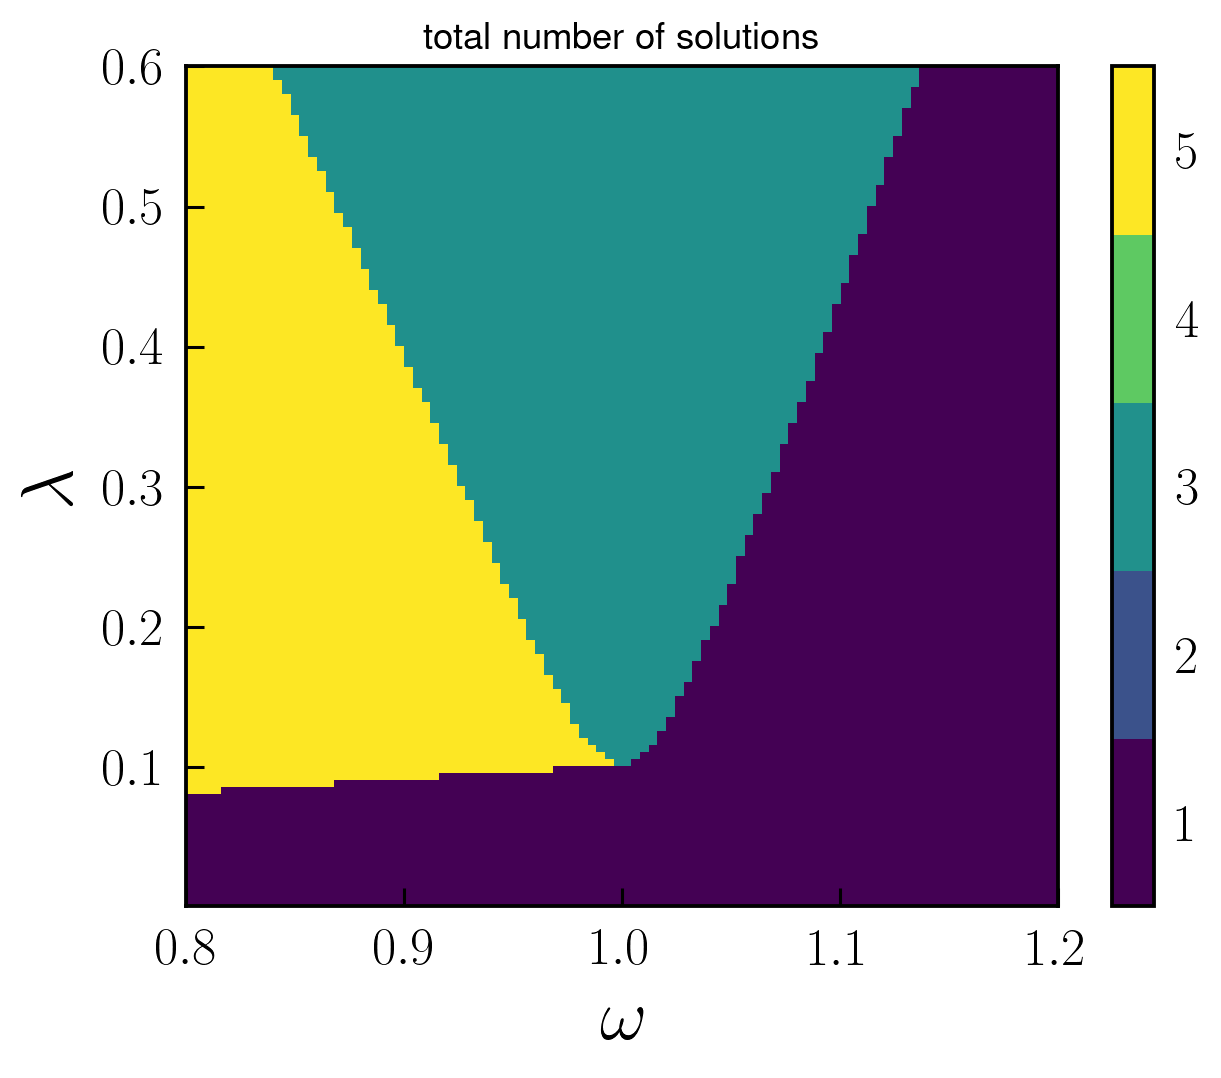

(Dict{String, Any}("observable" => "nsols", "data" => [5 5 … 1 1; 5 5 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], "(ω_min ω_max λ_min λ_max)" => [0.8, 1.2, 0.001, 0.6]), PyObject <matplotlib.image.AxesImage object at 0x7f650f4653d0>, 5)

In [19]:
HarmonicBalance.plot_2D_phase_diagram(phase_diagram, stable=false,observable="nsols",filename="plot_2D_phase_diagram")

In [10]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=true, nrows=2,ncols=2,cut_dim="2",cut_type="solutions",observable="nsols",marker_classification="ω^15* sqrt(u1^2 + v1^2) < 0.1" )

/usr/lib/python3.8/tkinter/__init__.py:814: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


PyObject <matplotlib.colorbar.Colorbar object at 0x7f8f07cef970>

In [11]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=true, nrows=1,cut_dim="1",cut_type="transform",observable="binary",string_f=["u1^2+v1^2"])

PyObject <matplotlib.colorbar.Colorbar object at 0x7f8ee76e2820>

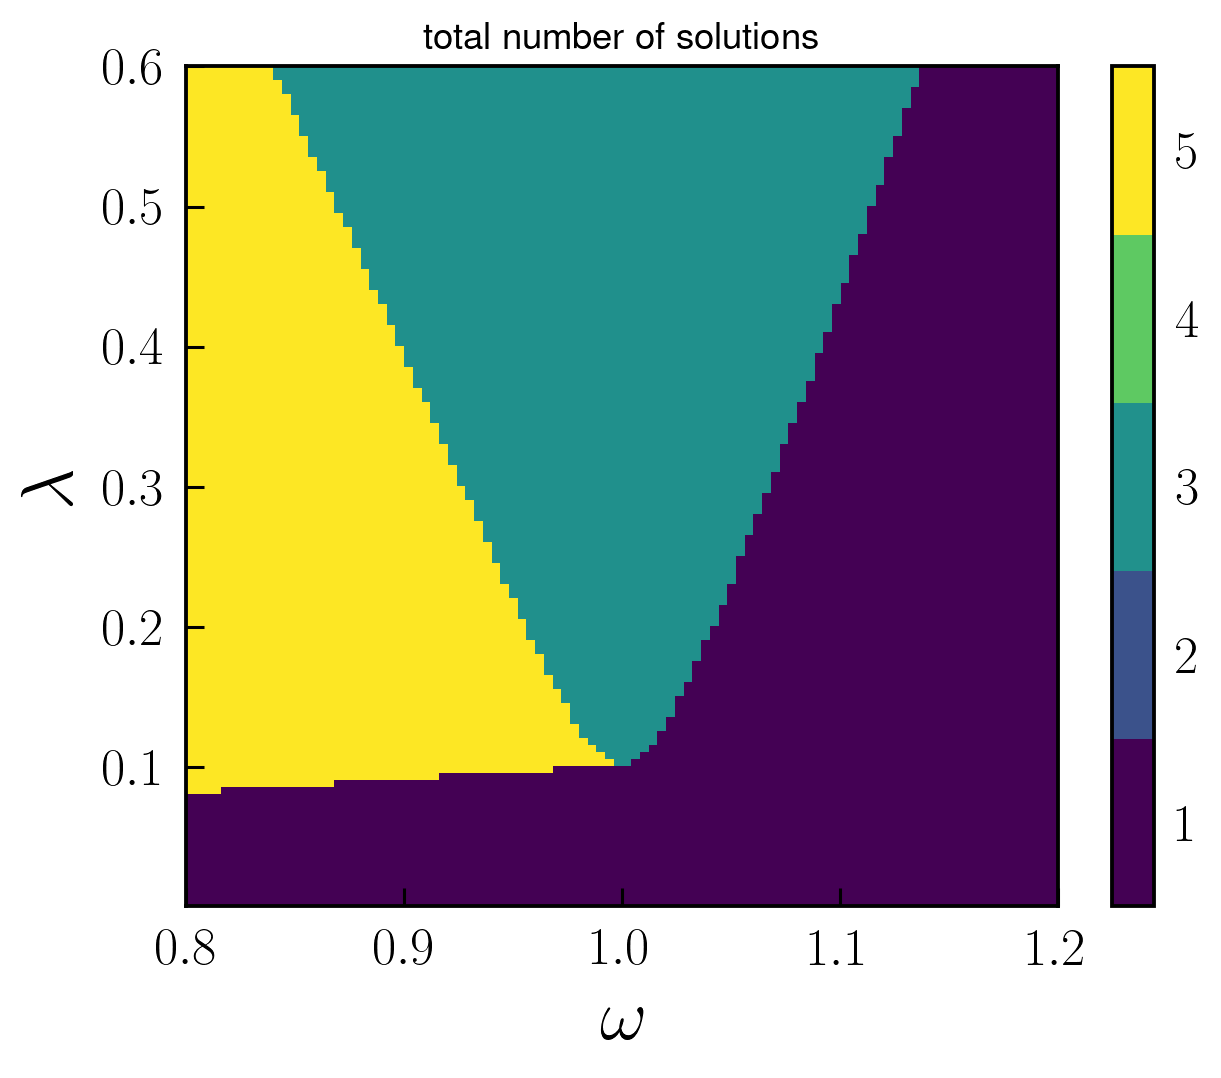

(Dict{String, Any}("observable" => "nsols", "data" => [5 5 … 1 1; 5 5 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], "(ω_min ω_max λ_min λ_max)" => [0.8, 1.2, 0.001, 0.6]), PyObject <matplotlib.image.AxesImage object at 0x7f6517eec790>, 5)

In [10]:
HarmonicBalance.plot_2D_phase_diagram(phase_diagram, stable=false,observable="nsols")

In [13]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=true, nrows=2,ncols=2,cut_dim="1",cut_type="solutions")

PyObject <matplotlib.colorbar.Colorbar object at 0x7f8f10cb1820>

In [14]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=false, nrows=4,cut_dim="1",cut_type="jacobian_eigenvalues")

PyObject <matplotlib.colorbar.Colorbar object at 0x7f8f10d84370>

# coupled parametrons

In [15]:
@variables ω₁, ω₂,ω, γ,λ, t, T, ω, α₁, α₂, J;
@variables x(t), y(t);

In [16]:
#sympy object for the equation of motion
natural_equation = [d(d(x, t),t) + ω₁^2*(1-λ*cos(2*ω*t)) * x + γ*d(x,t)  + α₁*x^3 - J*y , 
                    d(d(y,t),t)  + ω₂^2*(1-λ*cos(2*ω*t)) * y + γ*d(y,t)  + α₂*y^3 - J*x] 


dEOM_coupled = DifferentialEquation(natural_equation, [x, y])

add_harmonic!(dEOM_coupled, x, ω) # x will rotate at ω
add_harmonic!(dEOM_coupled, y, ω) # y will rotate at ω

show(dEOM_coupled)

@time harmonic_eqs_coupled = HarmonicBalance.get_harmonic_equations(dEOM_coupled, slow_time=T, fast_time=t)

"equations"

OrderedCollections.OrderedDict{Symbolics.Num, Symbolics.Equation} with 2 entries:
  x(t) => α₁*(x(t)^3) + γ*Differential(t)(x(t)) + (ω₁^2)*(1 - λ*cos(2t*ω))*x(t)…
  y(t) => α₂*(y(t)^3) + γ*Differential(t)(y(t)) + (ω₂^2)*(1 - λ*cos(2t*ω))*y(t)…

"harmonics"

OrderedCollections.OrderedDict{Symbolics.Num, Vector{Symbolics.Num}} with 2 entries:
  x(t) => [ω]
  y(t) => [ω]

  4.040079 seconds (5.25 M allocations: 276.067 MiB, 2.48% gc time, 93.20% compilation time)


A set of 4 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T)
Parameters: α₁, ω, γ, ω₁, λ, J, α₂, ω₂

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)
y(t) = u2(T)*cos(ωt) + v2(T)*sin(ωt)

Harmonic equations:

γ*Differential(T)(u1(T)) + (ω₁^2)*u1(T) + (3//4)*α₁*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α₁*(v1(T)^2)*u1(T) - J*u2(T) - (ω^2)*u1(T) - (1//2)*λ*(ω₁^2)*u1(T) ~ 0

γ*Differential(T)(v1(T)) + (ω₁^2)*v1(T) + (3//4)*α₁*(v1(T)^3) + (3//4)*α₁*(u1(T)^2)*v1(T) + (1//2)*λ*(ω₁^2)*v1(T) - J*v2(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - γ*ω*u1(T) ~ 0

γ*Differential(T)(u2(T)) + (ω₂^2)*u2(T) + (3//4)*α₂*(u2(T)^3) + γ*ω*v2(T) + (2//1)*ω*Differential(T)(v2(T)) + (3//4)*α₂*(v2(T)^2)*u2(T) - J*u1(T) - (ω^2)*u2(T) - (1//2)*λ*(ω₂^2)*u2(T) ~ 0

γ*Differential(T)(v2(T)) + (ω₂^2)*v2(T) + (3//4)*α₂*(v2(T)^3) + (1//2)*λ*(ω₂^2)*v2(T) + (3//4)*α₂*(u2(T)^2)*v2(T) - J*v1(T) - (2//1)*ω*Differential(T)(u2(T)) - (ω^2)*v2(T) - γ*ω*u2(T) ~ 0


# 2D phase diagram for two coupled parametrons

In [17]:
fixed_parameters = [ω₁ => 1., ω₂ => 1., γ => 0.001, α₁ => -0.01, α₂ => -0.01, J => 0.]
swept_parameters = (ω => LinRange(0.,1.5, 100), λ => LinRange(0.001,0.6, 100))
result_coupled = HarmonicBalance.get_steady_states(harmonic_eqs_coupled, swept_parameters, fixed_parameters; random_warmup=true, threading=false)

Solving for 10000 parameters...  54%|██████████▎        |  ETA: 0:00:13
  # parameters solved:  5411
  # paths tracked:      135275

LoadError: DimensionMismatch("new dimensions (100, 100) must be consistent with array size 5417")

In [18]:
HarmonicBalance.plot_2D_phase_diagram(result_coupled, stable=false);

LoadError: UndefVarError: result_coupled not defined

In [19]:
HarmonicBalance.plot_2D_phase_diagram(result_coupled, stable=true);

LoadError: UndefVarError: result_coupled not defined

In [20]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(result_coupled, stable=false, nrows=3, ncols=3,cut_dim="1",cut_type="solutions",observable="nsols")

LoadError: UndefVarError: result_coupled not defined